# Temperature Forecast Project using ML

Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [1]:
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv'
df=pd.read_csv(url)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
df['station']=df['station'].fillna(np.mean(df['station']))

In [6]:
df['Present_Tmax']=df['Present_Tmax'].fillna(np.median(df['Present_Tmax']))

In [7]:
df['Present_Tmin']=df['Present_Tmin'].fillna(np.mean(df['Present_Tmin']))

In [8]:
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(np.mean(df['LDAPS_RHmin']))

In [9]:
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(np.mean(df['LDAPS_RHmax']))

In [10]:
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(np.mean(df['LDAPS_Tmax_lapse']))

In [11]:
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(np.mean(df['LDAPS_Tmin_lapse']))

In [12]:
df['LDAPS_WS']=df['LDAPS_WS'].fillna(np.mean(df['LDAPS_WS']))

In [13]:
df['LDAPS_LH']=df['LDAPS_LH'].fillna(np.mean(df['LDAPS_LH']))

In [14]:
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(np.mean(df['LDAPS_CC1']))

In [15]:
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(np.mean(df['LDAPS_CC2']))

In [16]:
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(np.mean(df['LDAPS_CC3']))

In [17]:
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(np.mean(df['LDAPS_CC4']))

In [18]:
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(np.mean(df['LDAPS_PPT1']))

In [19]:
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(np.mean(df['LDAPS_PPT2']))

In [20]:
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(np.mean(df['LDAPS_PPT3']))

In [21]:
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(np.mean(df['LDAPS_PPT4']))

In [22]:
df['Next_Tmax']=df['Next_Tmax'].fillna(np.mean(df['Next_Tmax']))

In [23]:
df['Next_Tmin']=df['Next_Tmin'].fillna(np.mean(df['Next_Tmin']))

In [24]:
df.isnull().sum()

station              0
Date                 2
Present_Tmax        70
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

In [25]:
df['Present_Tmax']=df['Present_Tmax'].fillna(np.mean(df['Present_Tmax']))

In [26]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [27]:
df.drop('LDAPS_PPT2',inplace=True,axis=1)

In [28]:
df.drop('LDAPS_PPT3',inplace=True,axis=1)

In [29]:
df.drop('LDAPS_PPT4',inplace=True,axis=1)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.161697,0.130928,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.159444,0.127727,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.204091,0.142125,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.161157,0.134249,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.178892,0.170021,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [30]:
df.drop('LDAPS_PPT1',inplace=True,axis=1)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.203896,0.161697,0.130928,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.251771,0.159444,0.127727,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.257469,0.204091,0.142125,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.226002,0.161157,0.134249,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.249995,0.178892,0.170021,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [31]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [32]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat',
       'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Encoding DataFrame

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.203896,0.161697,0.130928,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.251771,0.159444,0.127727,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.257469,0.204091,0.142125,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.226002,0.161157,0.134249,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.249995,0.178892,0.170021,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.081035,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.074962,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,304,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.059869,0.000000,0.000796,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,310,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [35]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [36]:
df.dtypes

station             float64
Date                  int64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [37]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.203896,0.161697,0.130928,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.251771,0.159444,0.127727,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.257469,0.204091,0.142125,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.226002,0.161157,0.134249,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.249995,0.178892,0.170021,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Visualization of Data

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='station', ylabel='Count'>

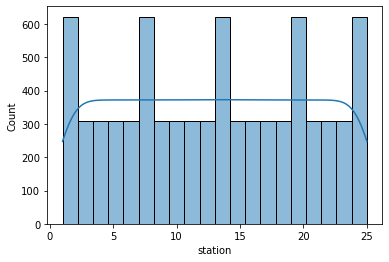

In [39]:
sns.histplot(x='station',data=df,kde=True,bins=20)

<AxesSubplot:xlabel='Date', ylabel='Count'>

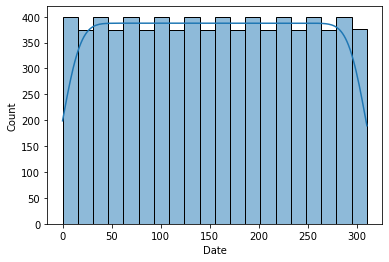

In [40]:
sns.histplot(x='Date',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

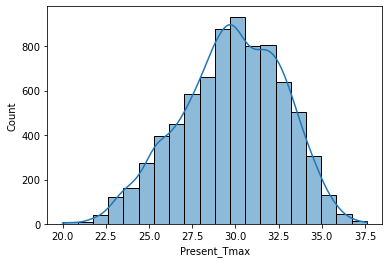

In [41]:
sns.histplot(x='Present_Tmax',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

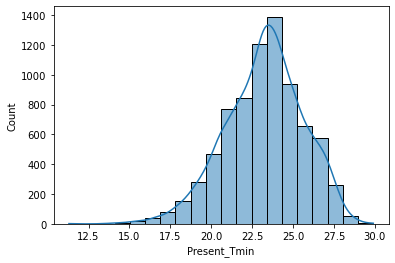

In [42]:
sns.histplot(x='Present_Tmin',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

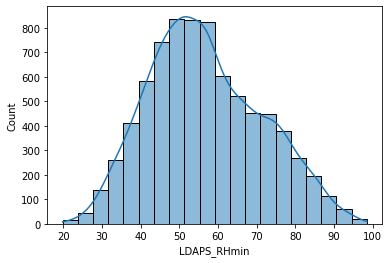

In [43]:
sns.histplot(x='LDAPS_RHmin',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

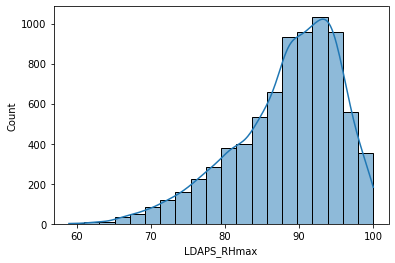

In [44]:
sns.histplot(x='LDAPS_RHmax',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

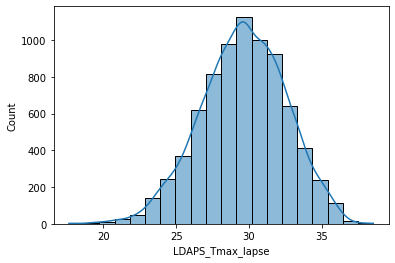

In [45]:
sns.histplot(x='LDAPS_Tmax_lapse',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

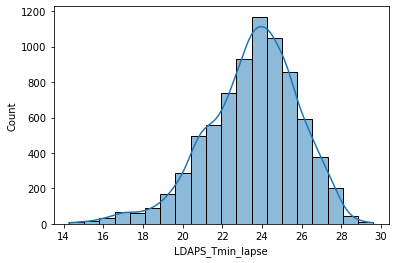

In [46]:
sns.histplot(x='LDAPS_Tmin_lapse',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

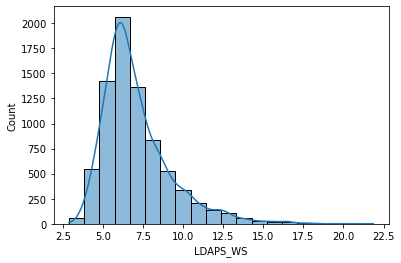

In [47]:
sns.histplot(x='LDAPS_WS',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

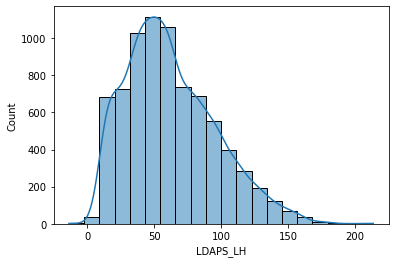

In [48]:
sns.histplot(x='LDAPS_LH',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Count'>

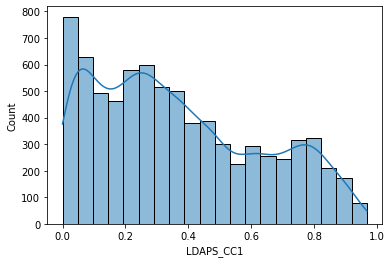

In [49]:
sns.histplot(x='LDAPS_CC1',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Count'>

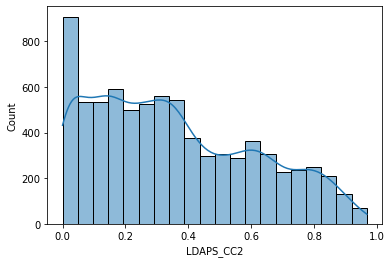

In [50]:
sns.histplot(x='LDAPS_CC2',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Count'>

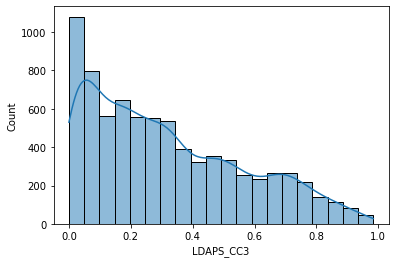

In [51]:
sns.histplot(x='LDAPS_CC3',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Count'>

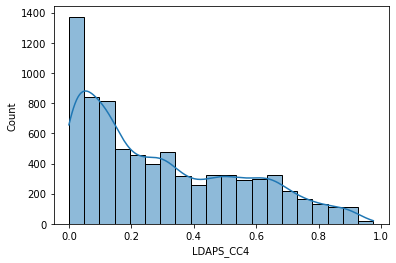

In [52]:
sns.histplot(x='LDAPS_CC4',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='lat', ylabel='Count'>

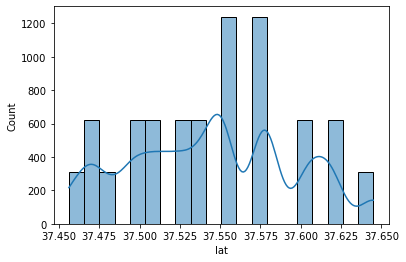

In [53]:
sns.histplot(x='lat',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='lon', ylabel='Count'>

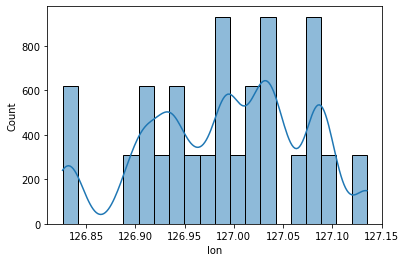

In [54]:
sns.histplot(x='lon',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='DEM', ylabel='Count'>

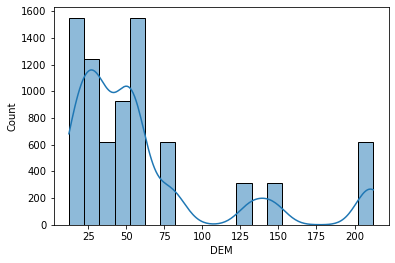

In [55]:
sns.histplot(x='DEM',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='Slope', ylabel='Count'>

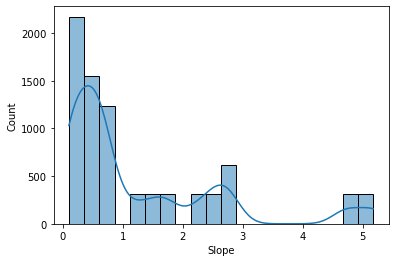

In [56]:
sns.histplot(x='Slope',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Count'>

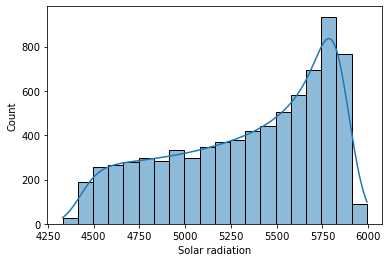

In [57]:
sns.histplot(x='Solar radiation',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

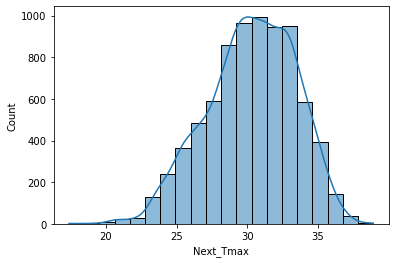

In [58]:
sns.histplot(x='Next_Tmax',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

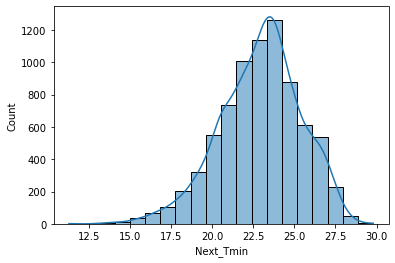

In [59]:
sns.histplot(x='Next_Tmin',bins=20,kde=True,data=df)

# Describing Dataset

In [60]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,154.540119,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.356080,0.318404,0.299191,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,89.517900,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,0.256810,0.249148,0.253114,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.142328,0.103100,0.082741,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,155.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.315667,0.265264,0.232354,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.554963,0.494007,0.497230,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,310.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,0.968353,0.983789,0.974710,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

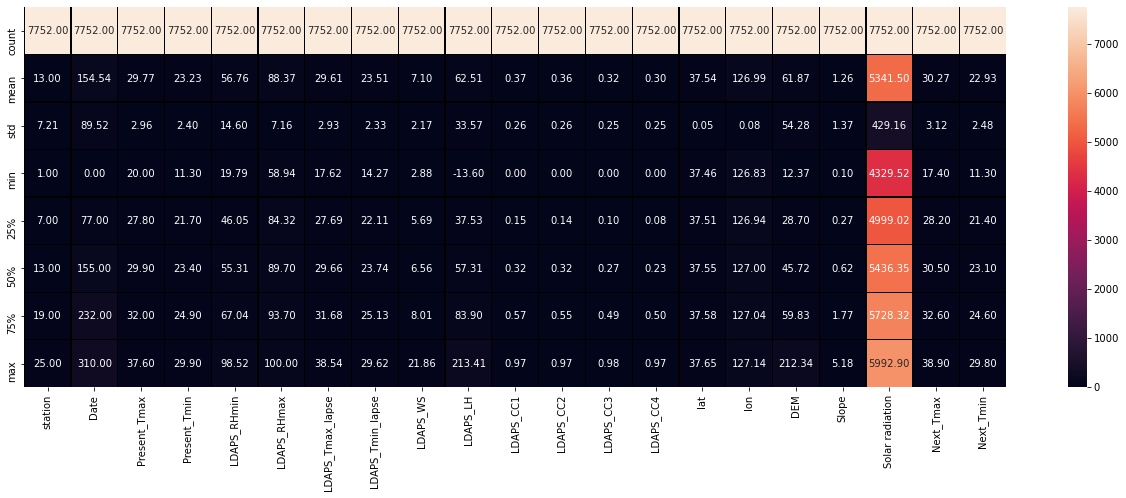

In [61]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.2,fmt='0.2f')

In [62]:
df.corr()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000e+00,1.417926e-17,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,...,0.003396,0.000694,0.006126,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Date,1.417926e-17,1.000000e+00,-0.136280,-0.103565,-0.069333,-0.021348,-0.156184,-0.172665,-0.044676,-0.017134,...,-0.015259,-0.053241,-0.038615,0.000052,-0.000061,0.000417,0.000452,-0.433311,-0.116535,-0.126890
Present_Tmax,1.126554e-01,-1.362798e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,...,-0.213791,-0.144018,-0.140729,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,1.316462e-01,-1.035652e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,...,0.090263,-0.002772,-0.044335,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-6.673316e-02,-6.933333e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,...,0.745443,0.689679,0.514075,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-1.669845e-01,-2.134839e-02,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,...,0.391330,0.226957,0.130619,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,6.910718e-02,-1.561839e-01,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,...,-0.523619,-0.541327,-0.429539,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,1.047582e-01,-1.726650e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,...,0.047727,-0.044018,-0.080335,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,5.277000e-03,-4.467571e-02,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,...,0.261090,0.242991,0.220533,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-1.333566e-01,-1.713394e-02,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,...,-0.264280,-0.245583,-0.172766,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440


<AxesSubplot:>

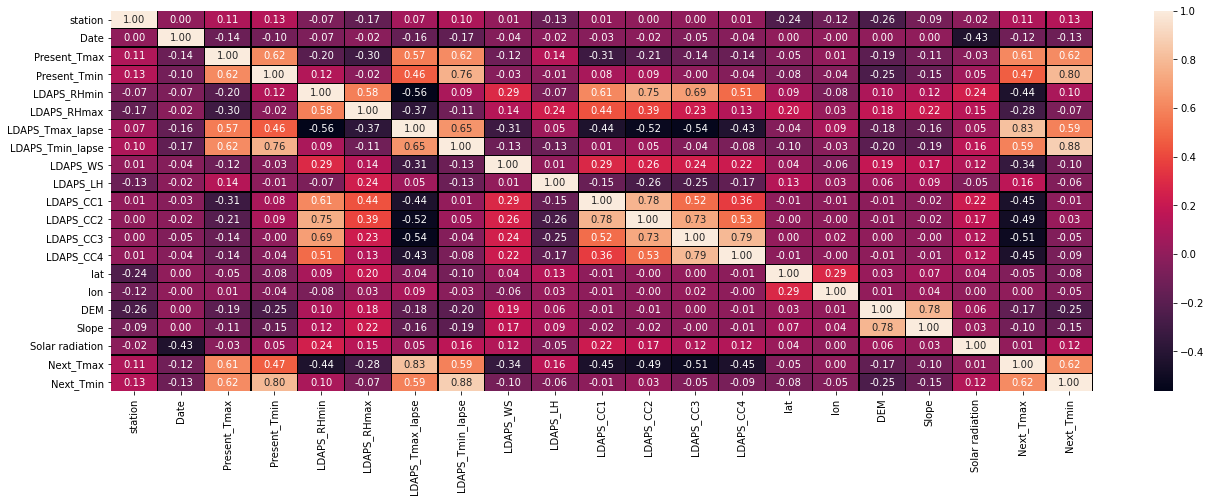

In [63]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth=0.2,fmt='0.2f')

# Outliers Checking

In [64]:
df.skew()

station             0.000000
Date                0.000008
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

-/+0.5 threshold

<AxesSubplot:>

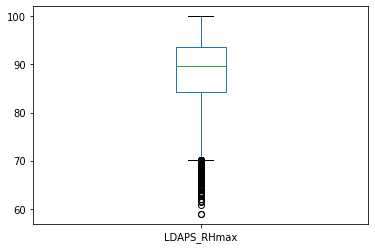

In [65]:
df['LDAPS_RHmax'].plot.box()

<AxesSubplot:>

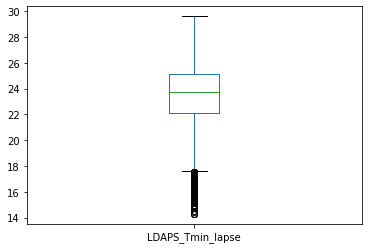

In [66]:
df['LDAPS_Tmin_lapse'].plot.box()

<AxesSubplot:>

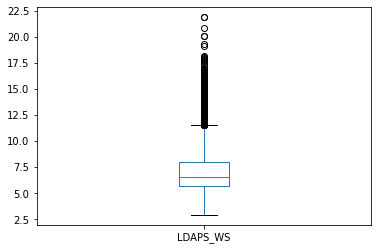

In [67]:
df['LDAPS_WS'].plot.box()

<AxesSubplot:>

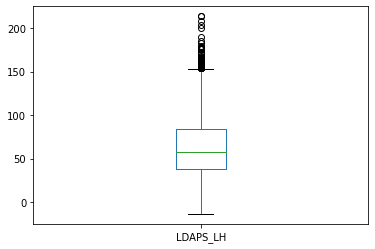

In [68]:
df['LDAPS_LH'].plot.box()

<AxesSubplot:>

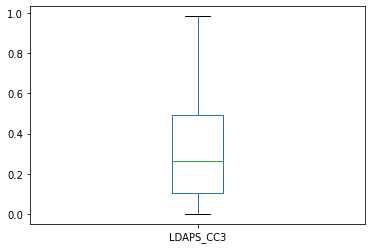

In [69]:
df['LDAPS_CC3'].plot.box()

<AxesSubplot:>

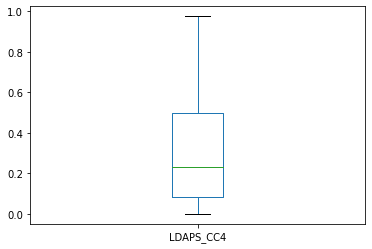

In [70]:
df['LDAPS_CC4'].plot.box()

<AxesSubplot:>

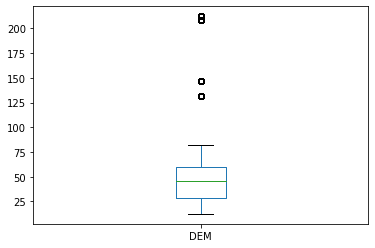

In [71]:
df['DEM'].plot.box()

<AxesSubplot:>

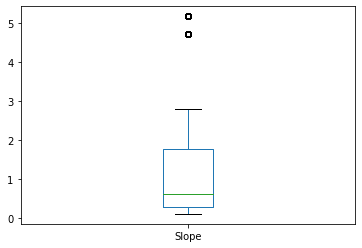

In [72]:
df['Slope'].plot.box()

<AxesSubplot:>

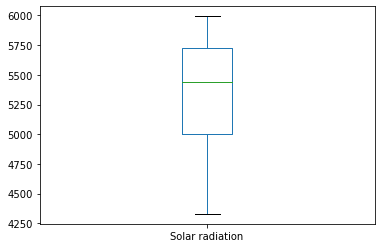

In [73]:
df['Solar radiation'].plot.box()

# Outlier Removal

In [74]:
df.shape

(7752, 21)

In [75]:
from scipy.stats import zscore

In [76]:
import numpy as np

In [77]:
z=np.abs(zscore(df))
Threshold=3
np.where(z>3)

(array([  25,   33,   44,  175,  194,  269,  294,  344,  375,  394,  419,
         494,  519,  544,  569,  575,  584,  594,  969, 1324, 1424, 1494,
        1652, 1661, 1663, 1664, 1670, 1674, 1778, 1779, 1781, 1791, 1794,
        2175, 2176, 2177, 2178, 2179, 2179, 2180, 2181, 2181, 2182, 2183,
        2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194,
        2195, 2196, 2197, 2198, 2199, 2353, 2354, 2356, 2369, 2375, 2378,
        2394, 2441, 2528, 2544, 2569, 2675, 2750, 2775, 3104, 3116, 3166,
        3184, 3190, 3191, 3191, 3202, 3209, 3211, 3215, 3216, 3220, 3224,
        3261, 3263, 3264, 3266, 3268, 3272, 3273, 3286, 3288, 3289, 3298,
        3375, 3378, 3394, 3400, 3404, 3406, 3407, 3408, 3409, 3411, 3413,
        3419, 3441, 3454, 3466, 3475, 3477, 3478, 3479, 3480, 3481, 3482,
        3482, 3483, 3484, 3485, 3486, 3486, 3487, 3488, 3488, 3489, 3491,
        3493, 3494, 3495, 3497, 3498, 3499, 3525, 3719, 3944, 3950, 3969,
        4475, 4476, 4478, 4484, 4494, 

In [78]:
df_new=df[(z<3).all(axis=1)]
df_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.203896,1.616969e-01,0.130928,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.251771,1.594441e-01,0.127727,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.257469,2.040915e-01,0.142125,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.226002,1.611574e-01,0.134249,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.249995,1.788925e-01,0.170021,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.030169,0.000000e+00,0.004380,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,304,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.024518,5.850000e-07,0.017678,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.081035,0.000000e+00,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.074962,0.000000e+00,0.000000,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


Percentage Data loss

In [79]:
Data_loss=((7752-7468)/7752)*100
Data_loss

3.663570691434469

# Separating x and y

In [80]:
x=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']

In [81]:
from sklearn.preprocessing import power_transform

In [82]:
x=power_transform(x,method='yeo-johnson')
x

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


array([[-1.86035552,  1.38806094, -0.40889726, ...,  1.31415303,
         1.8494304 , -0.74529314],
       [-1.64838475,  1.38806094,  0.70512271, ..., -0.38533562,
         1.40070208, -0.24085488],
       [-1.4548483 ,  1.38806094,  0.59569241, ..., -0.94916364,
         1.38064953,  0.34237906],
       ...,
       [ 1.54118849,  1.51004105, -2.04992031, ..., -0.93504362,
        -1.74476253, -2.01944984],
       [ 0.0770875 ,  1.56182251, -2.84618687, ..., -1.47726373,
        -1.88707057, -3.46891694],
       [ 0.0770875 ,  1.56182251,  2.9810374 , ...,  1.74216318,
         1.8494304 ,  3.26846173]])

# Scaling Data

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [84]:
x=sc.fit_transform(x)
x

array([[-1.86035552,  1.38806094, -0.40889726, ...,  1.31415303,
         1.8494304 , -0.74529314],
       [-1.64838475,  1.38806094,  0.70512271, ..., -0.38533562,
         1.40070208, -0.24085488],
       [-1.4548483 ,  1.38806094,  0.59569241, ..., -0.94916364,
         1.38064953,  0.34237906],
       ...,
       [ 1.54118849,  1.51004105, -2.04992031, ..., -0.93504362,
        -1.74476253, -2.01944984],
       [ 0.0770875 ,  1.56182251, -2.84618687, ..., -1.47726373,
        -1.88707057, -3.46891694],
       [ 0.0770875 ,  1.56182251,  2.9810374 , ...,  1.74216318,
         1.8494304 ,  3.26846173]])

In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0, the training accuracy is :- 0.7839513336028936
At random state 0,the testing accuracy is :- 0.7909498463131737


At random state 1, the training accuracy is :- 0.7853311309462099
At random state 1,the testing accuracy is :- 0.78494119661525


At random state 2, the training accuracy is :- 0.7876596848988046
At random state 2,the testing accuracy is :- 0.7763186456493922


At random state 3, the training accuracy is :- 0.7842494272539607
At random state 3,the testing accuracy is :- 0.789594383010717


At random state 4, the training accuracy is :- 0.7814142741773253
At random state 4,the testing accuracy is :- 0.8008597914898044


At random state 5, the training accuracy is :- 0.7849444942709041
At random state 5,the testing accuracy is :- 0.7866622679060351


At random state 6, the training accuracy is :- 0.7859290673749916
At random state 6,the testing accuracy is :- 0.7828970548578896


At random state 7, the training accuracy is :- 0.7859001589274894
At random sta

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dtr=DecisionTreeRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is :-1.0
At random state 0,the testing accuracy is :- 0.8022071113126792


At random state 1,the training accuracy is :-1.0
At random state 1,the testing accuracy is :- 0.7963036187647916


At random state 2,the training accuracy is :-1.0
At random state 2,the testing accuracy is :- 0.7990723421353517


At random state 3,the training accuracy is :-1.0
At random state 3,the testing accuracy is :- 0.8005398107704096


At random state 4,the training accuracy is :-1.0
At random state 4,the testing accuracy is :- 0.7842738088991128


At random state 5,the training accuracy is :-1.0
At random state 5,the testing accuracy is :- 0.7833031063579556


At random state 6,the training accuracy is :-1.0
At random state 6,the testing accuracy is :- 0.801107798967915


At random state 7,the training accuracy is :-1.0
At random state 7,the testing accuracy is :- 0.8055004277078438


At random state 8,the training accuracy is :-1.0
At random state 8,the testing ac

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [91]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [92]:
pred_test=dtr.predict(x_test)
pred_test

array([29.4, 23.4, 31.2, ..., 30.7, 35.1, 24.6])

In [93]:
print(r2_score(y_test,pred_test))

0.8265419207767088


In [94]:
from sklearn.svm import SVR

In [95]:
svr=SVR(kernel='linear')

In [96]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    print(f'At random state {i}, the training accuracy is :-{r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is :-{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0, the training accuracy is :-0.7814906439627358
At random state 0, the testing accuracy is :-0.7879165669586609


At random state 1, the training accuracy is :-0.7825918764405148
At random state 1, the testing accuracy is :-0.784483918816502


At random state 2, the training accuracy is :-0.7851534343499463
At random state 2, the testing accuracy is :-0.7730888049438793


At random state 3, the training accuracy is :-0.7815975867399436
At random state 3, the testing accuracy is :-0.7898834535629738


At random state 4, the training accuracy is :-0.7788372019707295
At random state 4, the testing accuracy is :-0.7999340027358836


At random state 5, the training accuracy is :-0.7820766254993899
At random state 5, the testing accuracy is :-0.7868550558121523


At random state 6, the training accuracy is :-0.7829287753895887
At random state 6, the testing accuracy is :-0.7815882183046504


At random state 7, the training accuracy is :-0.7830214107640123
At random state 7, 

# Cross validation of the model

In [97]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j}, the cv score is {cv_score} and the training score is {Train_accuracy} and the testing score is {Test_accuracy}')
    print('\n')

At cross fold 2, the cv score is [0.3344147  0.60509221] and the training score is 0.7836751866924672 and the testing score is 0.7800756979840499


At cross fold 3, the cv score is [0.35044684 0.48917859 0.58142081] and the training score is 0.7836751866924672 and the testing score is 0.7800756979840499


At cross fold 4, the cv score is [0.34732816 0.31661256 0.48604883 0.61457912] and the training score is 0.7836751866924672 and the testing score is 0.7800756979840499


At cross fold 5, the cv score is [0.36695224 0.45792004 0.27355661 0.70719822 0.42836172] and the training score is 0.7836751866924672 and the testing score is 0.7800756979840499


At cross fold 6, the cv score is [0.35902985 0.27563565 0.31060925 0.47878651 0.64380674 0.45428284] and the training score is 0.7836751866924672 and the testing score is 0.7800756979840499


At cross fold 7, the cv score is [0.30081561 0.36368834 0.32497281 0.22920035 0.52507109 0.71880085
 0.53905582] and the training score is 0.783675186

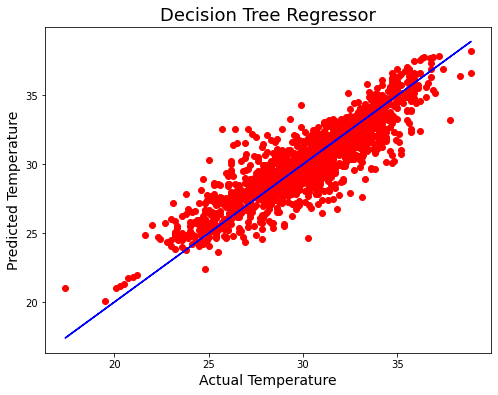

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Temperature',fontsize=14)
plt.ylabel('Predicted Temperature',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

# Regularization

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [100]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
re=Ridge()
clf=GridSearchCV(re,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [101]:
re=Ridge(alpha=1,random_state=0)
re.fit(x_train,y_train)
re.score(x_train,y_train)
pred_re=re.predict(x_test)

ree=r2_score(y_test,pred_re)
ree

0.7823489027142215

# Ensemble Technique

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [123]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 90.54669626229699
Cross Val Score : 69.99298289014536


# Saving the model

In [124]:
import pickle
filename='Temp.pred'
pickle.dump(rf,open(filename,'wb'))

In [125]:
loaded_model=pickle.load(open('Temp.pred','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9054669626229699


# Conclusion:

In [126]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550
Predicted,31.76,24.336498,29.298498,25.203,27.881,30.374,29.485,28.994,27.766,35.694,...,32.897,30.857749,32.078,25.27,28.211749,32.424,28.405,27.384749,27.199,30.468
Original,31.76,24.336498,29.298498,25.203,27.881,30.374,29.485,28.994,27.766,35.694,...,32.897,30.857749,32.078,25.27,28.211749,32.424,28.405,27.384749,27.199,30.468


# Taking Next_Tmin as label

In [138]:
features=df.drop('Next_Tmin',axis=1)
target=df['Next_Tmin']

In [128]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()


In [129]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [139]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr1.fit(features_train,target_train)
    pred_train=lr1.predict(features_train)
    pred_test=lr1.predict(features_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(target_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :- {r2_score(target_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is :- 0.8468729517546184
At random state 0,the testing accuracy is :- 0.8404705309101685


At random state 1,the training accuracy is :- 0.8458558861370145
At random state 1,the testing accuracy is :- 0.8449907880697818


At random state 2,the training accuracy is :- 0.8469920228762382
At random state 2,the testing accuracy is :- 0.8404898941382776


At random state 3,the training accuracy is :- 0.8447344710793354
At random state 3,the testing accuracy is :- 0.8491885531716579


At random state 4,the training accuracy is :- 0.8431239742823483
At random state 4,the testing accuracy is :- 0.8559398393955407


At random state 5,the training accuracy is :- 0.8470206341983602
At random state 5,the testing accuracy is :- 0.840088578993875


At random state 6,the training accuracy is :- 0.8449418240896256
At random state 6,the testing accuracy is :- 0.8487239568320054


At random state 7,the training accuracy is :- 0.8437534076968304
At random state 7,t

In [140]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    dtr.fit(features_train,target_train)
    pred_train=dtr.predict(features_train)
    pred_test=dtr.predict(features_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(target_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :- {r2_score(target_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is :- 1.0
At random state 0,the testing accuracy is :- 0.7972309806380455


At random state 1,the training accuracy is :- 1.0
At random state 1,the testing accuracy is :- 0.7769199697948028


At random state 2,the training accuracy is :- 1.0
At random state 2,the testing accuracy is :- 0.7644634462359267


At random state 3,the training accuracy is :- 1.0
At random state 3,the testing accuracy is :- 0.7843720731369646


At random state 4,the training accuracy is :- 1.0
At random state 4,the testing accuracy is :- 0.8130606220669991


At random state 5,the training accuracy is :- 1.0
At random state 5,the testing accuracy is :- 0.7745516607106417


At random state 6,the training accuracy is :- 1.0
At random state 6,the testing accuracy is :- 0.8004459768644225


At random state 7,the training accuracy is :- 1.0
At random state 7,the testing accuracy is :- 0.8059966860991922


At random state 8,the training accuracy is :- 1.0
At random state 8,the 

In [141]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=56)

In [142]:
dtr.fit(features_train,target_train)

DecisionTreeRegressor()

In [143]:
pred_test=dtr.predict(features_test)
pred_test

array([22.9, 25.4, 18.1, ..., 18.5, 15.7, 22.5])

In [144]:
print(r2_score(target_test,pred_test))

0.8258611567835437


# Cross Validation of the Model

In [145]:
Train_accuracy1=r2_score(target_train,pred_train)
Test_accuracy1=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score1=cross_val_score(dtr,features,target,cv=j)
    cv_mean1=cv_score1.mean()
    print(f'At cross fold {j}, the cv score is {cv_score1} and the training score is {Train_accuracy1} and the testing score is {Test_accuracy1}')
    print('\n')

At cross fold 2, the cv score is [0.60751248 0.70535162] and the training score is -0.9810078146366925 and the testing score is 0.8258611567835437


At cross fold 3, the cv score is [0.46251023 0.47119284 0.74887663] and the training score is -0.9810078146366925 and the testing score is 0.8258611567835437


At cross fold 4, the cv score is [0.34784849 0.55043637 0.68960958 0.7467605 ] and the training score is -0.9810078146366925 and the testing score is 0.8258611567835437


At cross fold 5, the cv score is [0.28292159 0.51063273 0.60474474 0.77730346 0.68650522] and the training score is -0.9810078146366925 and the testing score is 0.8258611567835437


At cross fold 6, the cv score is [0.36034368 0.3993719  0.47240073 0.58802198 0.72478704 0.71014504] and the training score is -0.9810078146366925 and the testing score is 0.8258611567835437


At cross fold 7, the cv score is [0.27853568 0.48160129 0.48164268 0.41735008 0.70359654 0.78109847
 0.71316092] and the training score is -0.981

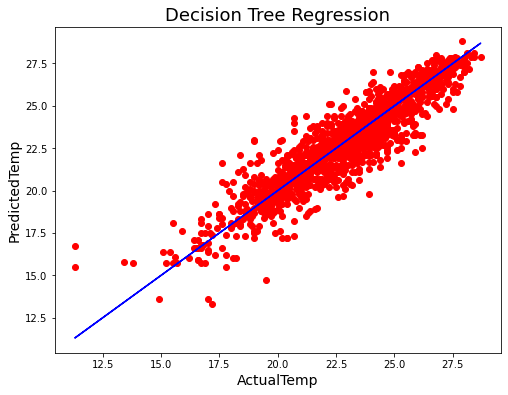

In [146]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='red')
plt.plot(target_test,target_test,color='b')
plt.xlabel('ActualTemp',fontsize=14)
plt.ylabel('PredictedTemp',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# Regularization

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [147]:
from sklearn.linear_model import Lasso 

parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [148]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls= ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.8527195344819858

In [149]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7922489892769399

# Ensemble Technique

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [151]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)


rfs=r2_score(target_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 score : 92.10889297351453
Cross Val Score : 77.91976994499498


# Saving the Model

In [152]:
import pickle
filename='Temp.pk1'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [153]:
loaded_model=pickle.load(open('Temp.pk1','rb'))
result=loaded_model.score(features_test,target_test)
print(result)

0.9210889297351452


In [154]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550
Predicted,23.515,24.878,19.128,23.539,23.641611,24.046,22.18,22.977,22.915,26.725,...,22.465,20.192,17.499322,23.219933,20.787644,22.657,23.935644,20.338,16.644,23.331
Original,23.515,24.878,19.128,23.539,23.641611,24.046,22.18,22.977,22.915,26.725,...,22.465,20.192,17.499322,23.219933,20.787644,22.657,23.935644,20.338,16.644,23.331
